In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


importing dataset

In [ ]:
import pandas as pd

# Read the data, but let's keep 'Date' and 'Time' as separate columns initially
# We will combine them manually.
df = pd.read_csv(r"C:\Users\asus\Downloads\archive\household_power_consumption.txt",
                 sep=';',
                 header=0,
                 # No infer_datetime_format or parse_dates here for now
                 # low_memory=False to potentially resolve DtypeWarning later
                 low_memory=False)

# 2. Combine 'Date' and 'Time' into a new 'datetime' column
df['datetime'] = df['Date'] + ' ' + df['Time']

# 3. Convert the 'datetime' column to actual datetime objects
# Handle the date format: %d/%m/%Y means Day/Month/Year
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M:%S')

# 4. Set the 'datetime' column as the index
df = df.set_index('datetime')

# Drop the original 'Date' and 'Time' columns if no longer needed
df = df.drop(columns=['Date', 'Time'])

# Now assign to dataset if that's your variable name preference
dataset = df

In [ ]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.tail()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [ ]:
print(f" the dataset has {df.shape[0]} rows and {df.shape[1]} coloumns")

 the dataset has 2075259 rows and 7 coloumns


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

handling missing values

In [ ]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
#understanding percent of data missing 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [ ]:
missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [ ]:
df.loc[df.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [ ]:
df.replace('?',np.nan, inplace= True)

In [ ]:
df.loc[df.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.dropna(how= 'all')

In [ ]:
for i in df.columns:
    df[i]=df[i].astype('float64')

C:\Users\asus\AppData\Local\Temp\ipykernel_17028\3419837792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].astype('float64')
C:\Users\asus\AppData\Local\Temp\ipykernel_17028\3419837792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].astype('float64')
C:\Users\asus\AppData\Local\Temp\ipykernel_17028\3419837792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
df.shape

(2049280, 7)

In [ ]:
# adding another sub_metering four columns 
values= df.values
df['sub_metering_4'] = (values[:,0]* 1000/ 60)-(values[:,4]+ values[:,5] +values[:,6])

C:\Users\asus\AppData\Local\Temp\ipykernel_17028\3449891083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub_metering_4'] = (values[:,0]* 1000/ 60)-(values[:,4]+ values[:,5] +values[:,6])


In [ ]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


DATA VISUALISATION 

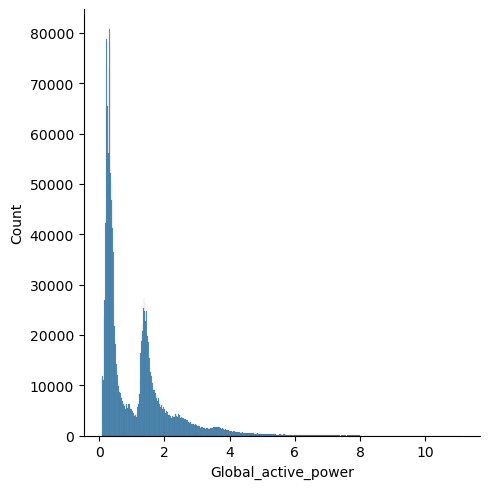

In [ ]:
sns.displot(df['Global_active_power'])

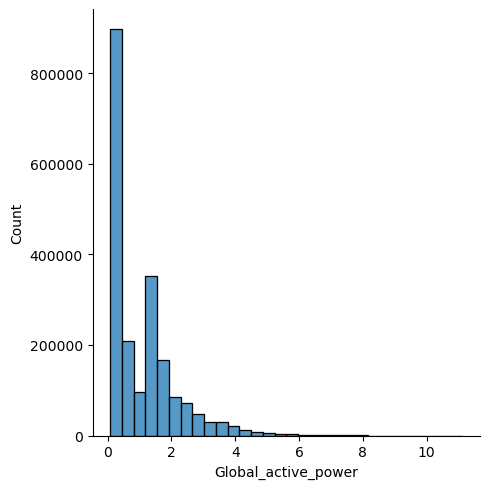

In [ ]:
sns.displot(df['Global_active_power'],kde=False, bins=30)

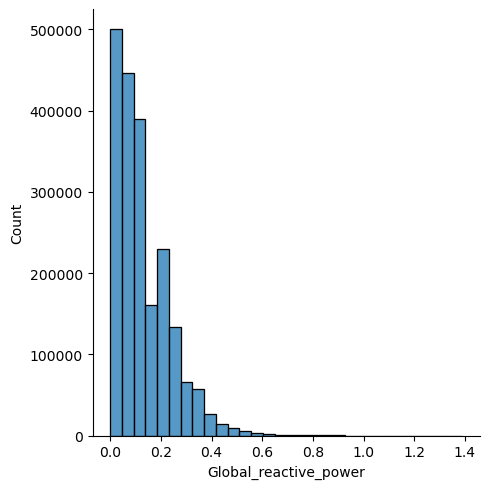

In [ ]:
sns.displot(df['Global_reactive_power'],kde=False, bins=30)

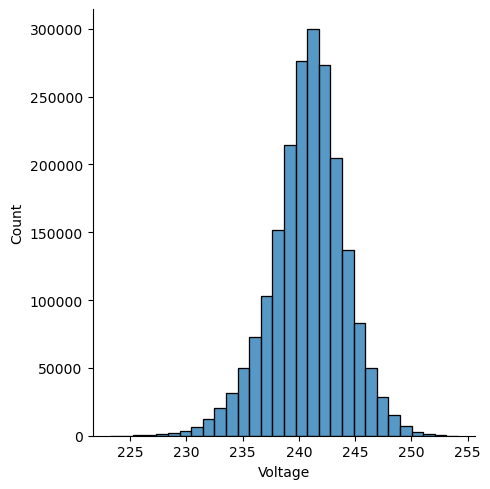

In [ ]:
sns.displot(df['Voltage'],kde=False, bins=30)

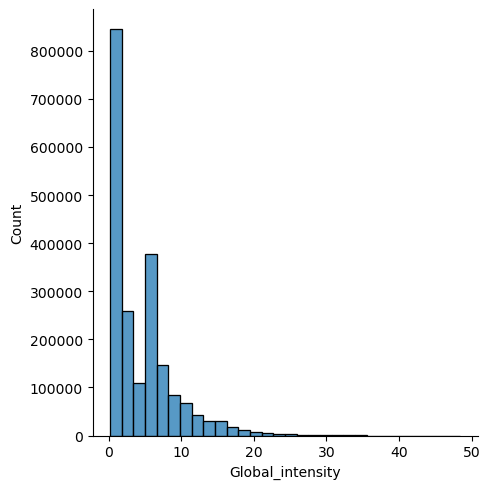

In [ ]:
sns.displot(df['Global_intensity'],kde=False, bins=30)

In [ ]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


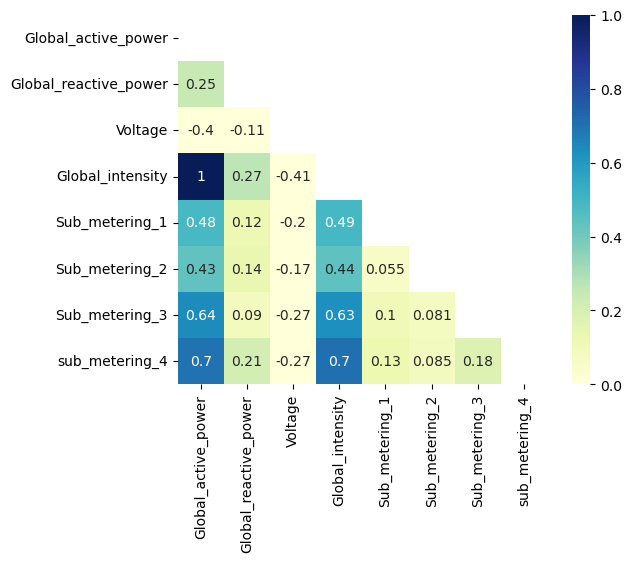

In [ ]:
#anakysing using heatmap
pearson = df.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson,vmax=1, vmin=0, square=-True, cbar=True, annot=True,cmap= "YlGnBu",mask=mask);

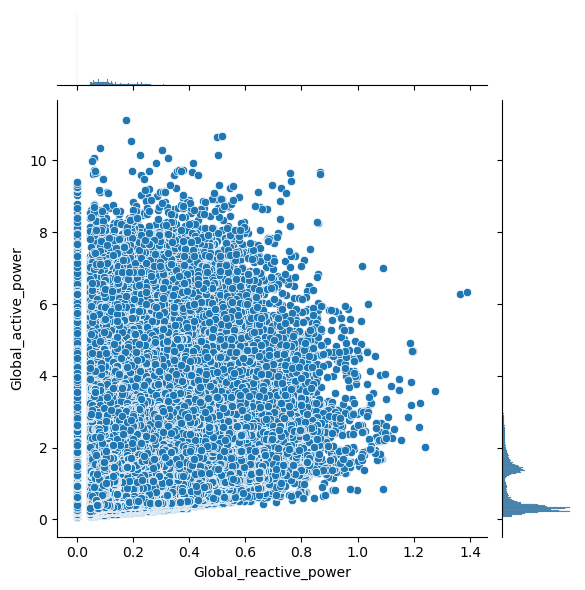

In [ ]:
#DATA VISUALISATION 
sns.jointplot(x='Global_reactive_power', y ='Global_active_power', data=df,kind='scatter')

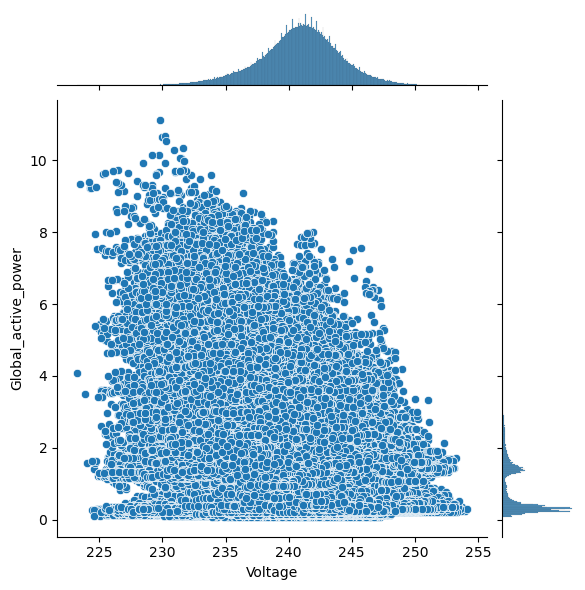

In [ ]:
sns.jointplot(x='Voltage', y ='Global_active_power', data=df,kind='scatter')

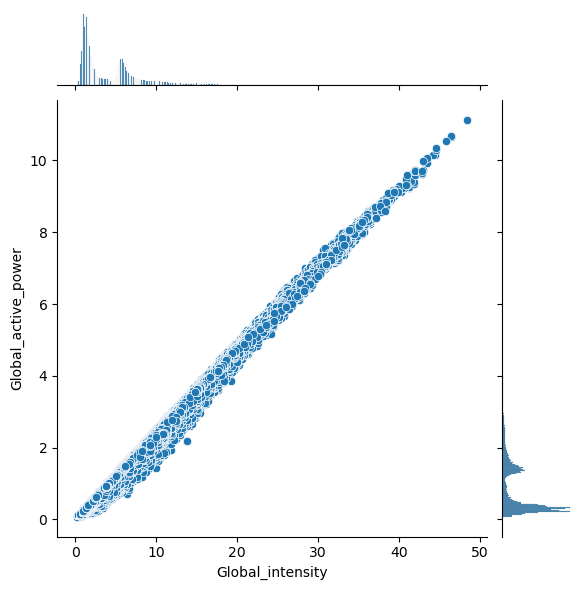

In [ ]:
sns.jointplot(x='Global_intensity', y ='Global_active_power', data=df,kind='scatter')

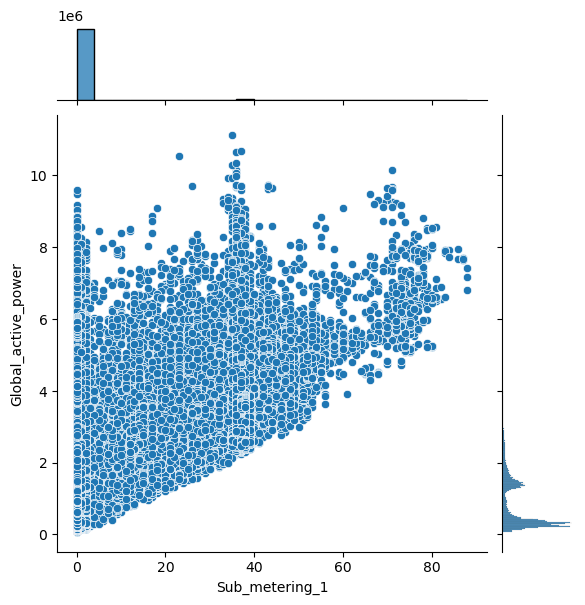

In [ ]:
sns.jointplot(x='Sub_metering_1', y ='Global_active_power', data=df,kind='scatter')

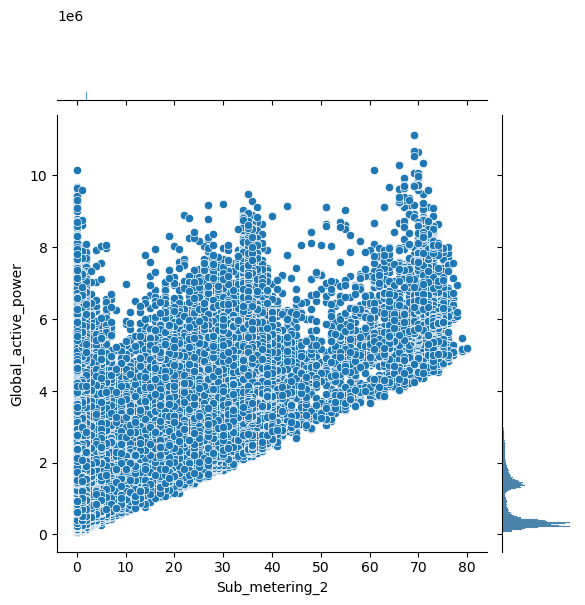

In [ ]:
sns.jointplot(x='Sub_metering_2', y ='Global_active_power', data=df,kind='scatter')

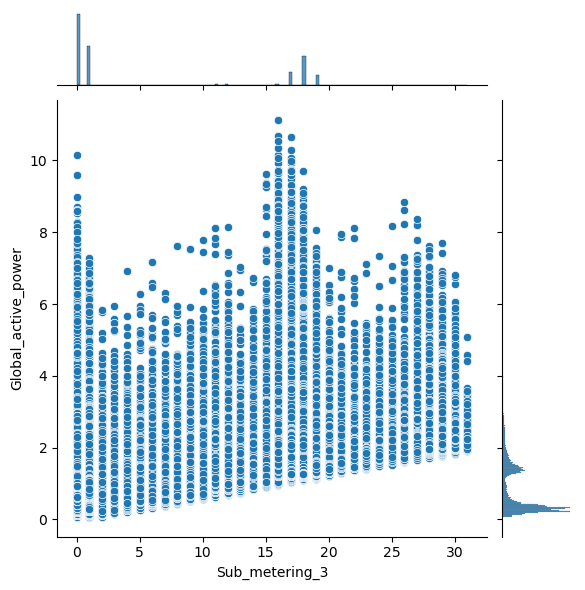

In [ ]:
sns.jointplot(x='Sub_metering_3', y ='Global_active_power', data=df,kind='scatter')

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

In [ ]:
pf=pd.DataFrame(df)


In [ ]:
pf.head()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [ ]:
dependent_variable_name='Global_active_power'



In [ ]:
y=pf[dependent_variable_name]
X=pf.drop(columns=[dependent_variable_name])



In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1434496, 7)
(614784, 7)
(1434496,)
(614784,)


In [ ]:
# training model
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
predictions

array([3.85 , 0.738, 0.222, ..., 1.562, 0.604, 1.534])

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R Square values:',metrics.r2_score(y_test,predictions))

MAE: 3.688813466902766e-15
MSE: 2.967477816520103e-29
RMSE: 5.447456118703576e-15
R Square values: 1.0


In [ ]:
import pickle
filament='PCA_model.pkl'
pickle.dump(lm,open(filament,'wb'))